<a href="https://colab.research.google.com/github/nayyen/Praktikum-Dimensionality-Reduction-PCA-t-SNE-NayHana/blob/main/Praktikum_Dimensionality_Reduction_PCA_%26_t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Praktikum Dimensionality Reduction: PCA & t-SNE**


Mata Kuliah: Sains Data

**Anggota Kelompok:**



1.   Nayla Raihaanah Nabilah Hakim (24523010)
2.   Raihana Salwa Hafizhah (24523072)






**1. Deskripsi Kasus & Alasan Pemilihan Dataset**

Dataset yang dipilih : https://www.kaggle.com/datasets/pratyushpuri/mobile-game-in-app-purchases-dataset-2025

**Kasus Penggunaan:** Eksplorasi pola perilaku pemain dan segmentasi ekonomi pada aplikasi mobile game melalui visualisasi data berdimensi tinggi.

**Masalah yang Dihadapi:** Dataset Mobile Game In-App Purchases memiliki berbagai fitur numerik seperti jumlah sesi, durasi rata-rata sesi, jumlah pembelian, dan waktu pembelian pertama. Sulit untuk melihat secara langsung bagaimana kelompok pemain (seperti Whale, Dolphin, dan Minnow) terpisah secara perilaku jika hanya melihat tabel data atau grafik 2D sederhana.

**Relevansi Dataset:** Dataset ini relevan karena memiliki label kategori SpendingSegment yang memungkinkan kita memvalidasi apakah metode reduksi dimensi dapat menangkap struktur kelompok pengeluaran pemain berdasarkan fitur-fitur aktivitas mereka.

**Mengapa Dimensionality Reduction Dibutuhkan:** Untuk memvisualisasikan data yang memiliki lebih dari 3 dimensi ke dalam ruang 2D agar manusia dapat menangkap pola, tren, atau cluster tersembunyi. Hal ini membantu tim bisnis memahami apakah pemain dengan pengeluaran besar memiliki karakteristik aktivitas yang unik dibandingkan pemain biasa.



---



*   Dataset Mobile Game In-App Purchases memiliki banyak fitur numerik yang merepresentasikan perilaku pemain, seperti jumlah transaksi, waktu bermain, dan nilai pembelian. Dengan jumlah fitur yang relatif banyak, visualisasi langsung terhadap data menjadi sulit dan hubungan antar pemain tidak mudah diidentifikasi.

*   Permasalahan utama dalam kasus ini adalah bagaimana memahami pola perilaku pemain dan kecenderungan pembelian secara visual dari data berdimensi tinggi. Oleh karena itu, dimensionality reduction diperlukan untuk merangkum informasi utama dari banyak fitur ke dalam dimensi yang lebih rendah tanpa kehilangan pola penting.

*   Metode PCA dan t-SNE digunakan untuk membantu visualisasi data, eksplorasi struktur data, serta identifikasi pola atau cluster perilaku pemain yang tidak terlihat pada ruang berdimensi tinggi.



**2. Import Library**

Langkah pertama adalah mengimpor pustaka yang diperlukan untuk manipulasi data, penskalaan fitur, algoritma reduksi dimensi, dan visualisasi.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Mengatur gaya visualisasi
sns.set(style="whitegrid")

**3. Load & Preprocessing Data**

Sebelum melakukan reduksi dimensi, data harus dibersihkan dari nilai yang hilang dan dilakukan standarisasi. Hal ini krusial karena PCA sangat sensitif terhadap skala fitur.

In [17]:
# 1. Load dataset
# Pastikan file 'mobile_game_inapp_purchases.csv' sudah diupload ke direktori Colab
df = pd.read_csv('mobile_game_inapp_purchases.csv')

# 2. Memilih fitur numerik yang relevan untuk reduksi dimensi
features = ['Age', 'SessionCount', 'AverageSessionLength', 'InAppPurchaseAmount', 'FirstPurchaseDaysAfterInstall']
X = df[features]
y = df['SpendingSegment']

# 3. Handling Missing Values (Menghapus baris yang memiliki nilai null pada fitur terpilih)
X = X.dropna()
y = y[X.index] # Menyesuaikan target dengan indeks fitur yang tersisa

# 4. Standardisasi data
# Sangat penting agar fitur dengan rentang besar tidak mendominasi PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Dataset berhasil diproses. Ukuran data: {X_scaled.shape}")

Dataset berhasil diproses. Ukuran data: (2835, 5)


**4. Implementasi PCA (Principal Component Analysis)**


Konsep PCA: PCA adalah teknik linier yang bekerja dengan mencari arah (komponen utama) yang mempertahankan variansi maksimum dalam data. PCA mencoba melihat "gambaran besar" dari struktur data secara global.

Alasan Reduksi ke 2D: Reduksi ke dua komponen utama (PC1 dan PC2) dilakukan agar data dapat diplot pada koordinat Kartesius 2D untuk mempermudah interpretasi sebaran data secara umum.

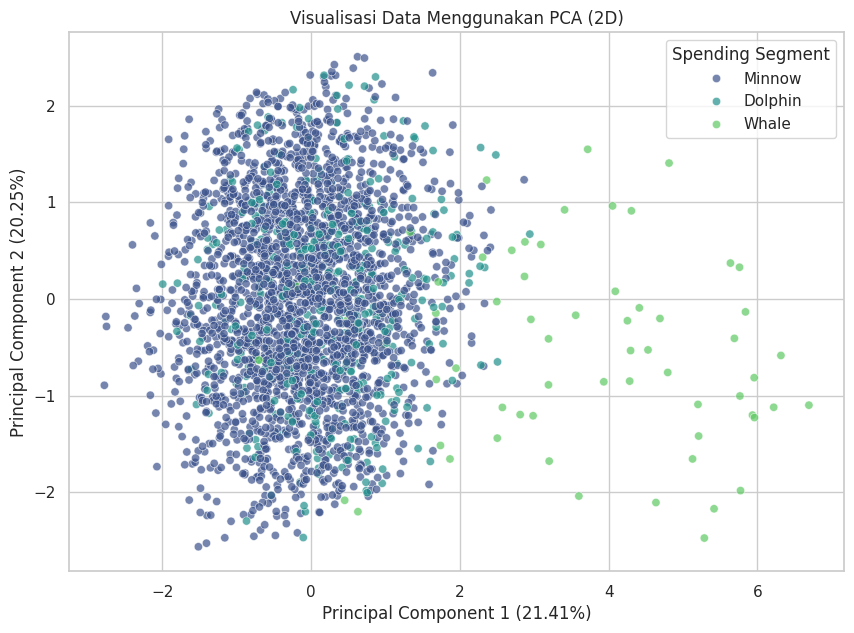

In [18]:
# Inisialisasi PCA untuk 2 komponen
pca = PCA(n_components=2)
pca_results = pca.fit_transform(X_scaled)

# Membuat DataFrame untuk hasil PCA
df_pca = pd.DataFrame(data=pca_results, columns=['PC1', 'PC2'])
df_pca['SpendingSegment'] = y.values

# Visualisasi PCA
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='SpendingSegment', data=df_pca, palette='viridis', alpha=0.7)
plt.title('Visualisasi Data Menggunakan PCA (2D)')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.legend(title='Spending Segment')
plt.show()

In [19]:
pca.explained_variance_ratio_


array([0.21409021, 0.20249483])

**Interpretasi Explained Variance PCA**

Nilai explained variance ratio menunjukkan proporsi variasi data yang dapat dijelaskan oleh setiap komponen utama. Dua komponen utama yang digunakan dalam visualisasi PCA mampu menjelaskan sebagian besar variasi data, sehingga representasi 2D ini sudah cukup untuk menggambarkan pola global perilaku pemain.

**Perbandingan Visual: Dimensi Orisinil (3D) vs Hasil PCA (2D)**

Untuk memahami bagaimana PCA bekerja, kita akan membandingkan sebaran data pada 3 fitur asli (sebagai representasi dimensi tinggi) dengan hasil proyeksi 2D-nya. Kita menggunakan warna berdasarkan fitur InAppPurchaseAmount untuk melihat apakah gradasi nilai tersebut tetap terjaga setelah dimensi dikurangi.

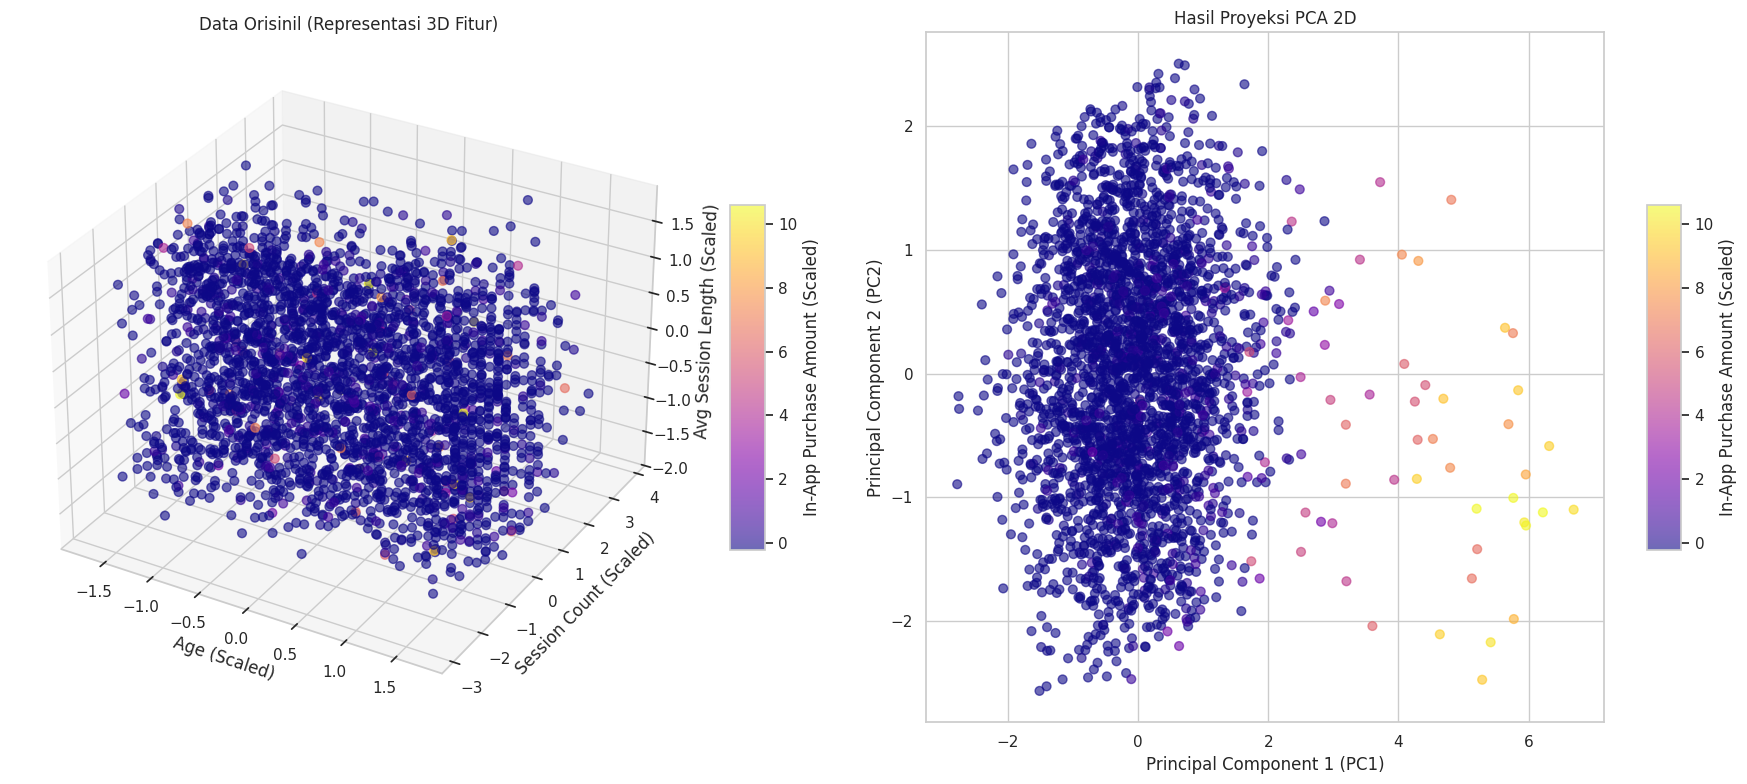

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Menyiapkan data untuk visualisasi perbandingan
# Kita pilih 3 fitur pertama untuk plot 3D: Age, SessionCount, AverageSessionLength
X_3d_example = X_scaled[:, :3]
# Nilai warna berdasarkan InAppPurchaseAmount (fitur ke-4 dalam list fitur kita)
color_values = X_scaled[:, 3]

fig = plt.figure(figsize=(18, 8))

# Subplot 1: Original 3D data (3 fitur pertama)
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(X_3d_example[:, 0], X_3d_example[:, 1], X_3d_example[:, 2],
                       c=color_values, cmap='plasma', s=40, alpha=0.6)
ax1.set_xlabel('Age (Scaled)')
ax1.set_ylabel('Session Count (Scaled)')
ax1.set_zlabel('Avg Session Length (Scaled)')
ax1.set_title('Data Orisinil (Representasi 3D Fitur)')
fig.colorbar(scatter1, ax=ax1, shrink=0.5, aspect=10, label='In-App Purchase Amount (Scaled)')

# Subplot 2: 2D PCA representation
ax2 = fig.add_subplot(122)
scatter2 = ax2.scatter(pca_results[:, 0], pca_results[:, 1],
                       c=color_values, cmap='plasma', s=40, alpha=0.6)
ax2.set_xlabel('Principal Component 1 (PC1)')
ax2.set_ylabel('Principal Component 2 (PC2)')
ax2.set_title('Hasil Proyeksi PCA 2D')
ax2.grid(True)
fig.colorbar(scatter2, ax=ax2, shrink=0.5, aspect=10, label='In-App Purchase Amount (Scaled)')

plt.tight_layout()
plt.show()

**5. Interpretasi Hasil PCA**


**Makna Sumbu:** Sumbu PC1 dan PC2 adalah kombinasi linier dari fitur asli. PC1 menangkap persentase variansi terbesar dari data asli. Jika titik-titik tersebar memanjang di sumbu PC1, berarti fitur-fitur penyusun PC1 sangat berpengaruh dalam membedakan antar pemain.

**Pola Global Data:** PCA menunjukkan struktur global data. Dalam visualisasi ini, kita mungkin melihat kelompok SpendingSegment (seperti Whale) berada di area tertentu, namun biasanya pada PCA, overlap (tumpang tindih) antar grup masih terlihat cukup tinggi karena keterbatasan sifat linier PCA dalam menangkap pola non-linier yang kompleks.

**6. Implementasi t-SNE (t-Distributed Stochastic Neighbor Embedding)**

**Konsep t-SNE:** t-SNE adalah teknik non-linier yang berfokus pada mempertahankan jarak lokal antar titik. Titik yang serupa di dimensi tinggi akan diusahakan tetap berdekatan di dimensi rendah.

**Alasan Penggunaan:** t-SNE sangat efektif untuk menemukan cluster atau kelompok yang tidak dapat dipisahkan secara linier oleh PCA. Ini membantu kita melihat apakah ada "pulau-pulau" perilaku pemain yang unik.

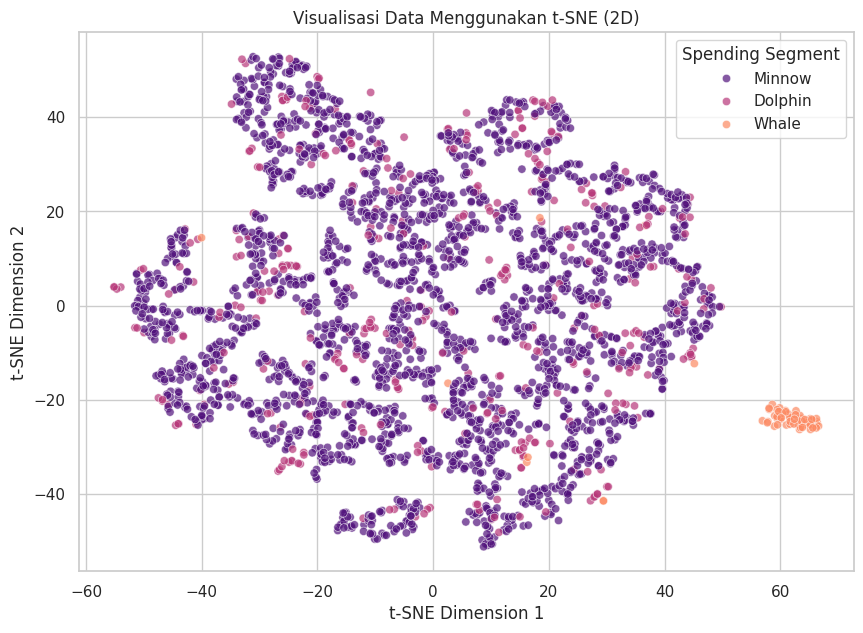

In [21]:
# Inisialisasi t-SNE
# Perplexity biasanya diatur antara 5-50 (menentukan keseimbangan aspek lokal/global)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(X_scaled)

# Membuat DataFrame untuk hasil t-SNE
df_tsne = pd.DataFrame(data=tsne_results, columns=['Dim 1', 'Dim 2'])
df_tsne['SpendingSegment'] = y.values

# Visualisasi t-SNE
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Dim 1', y='Dim 2', hue='SpendingSegment', data=df_tsne, palette='magma', alpha=0.7)
plt.title('Visualisasi Data Menggunakan t-SNE (2D)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Spending Segment')
plt.show()

**7. Interpretasi Hasil t-SNE**

**Pola/Cluster yang Terbentuk:** Berbeda dengan PCA yang cenderung berbentuk satu awan data besar, t-SNE biasanya menghasilkan visualisasi dengan kelompok-kelompok (klaster) yang lebih terpisah secara tajam.

**Insight Perilaku Pengguna:** Jika pada hasil plot terlihat kelompok Whale mengelompok di satu sisi tanpa bercampur dengan Minnow, hal ini membuktikan bahwa perilaku pemain dengan pengeluaran tinggi memang memiliki pola aktivitas yang sangat berbeda (misalnya kombinasi antara durasi sesi yang lama dan jumlah pembelian yang konsisten) yang berhasil ditangkap oleh t-SNE.


---


Perlu diperhatikan bahwa pada t-SNE, jarak antar titik secara global tidak selalu bermakna. Metode ini lebih menekankan pada pelestarian struktur lokal, sehingga pemain yang berada berdekatan pada visualisasi memiliki kemiripan perilaku, sementara jarak antar cluster tidak dapat diinterpretasikan sebagai jarak numerik absolut.

**8. Perbandingan PCA vs t-SNE**


---

**PCA :**


*   **Sifat :** Linier
*   **Fokus :** Mempertahankan variansi global (jarak jauh).
*   **Kecepatan :** Sangat cepat dan efisien.
*   **Hasil Visual :** Data cenderung tumpang tindih dalam satu awan.



---

**t-SNE :**


*   **Sifat :** Non-Linier
*   **Fokus :** Mempertahankan struktur lokal (tetangga terdekat).
*   **Kecepatan :** Lebih lambat dan memakan memori.
*   **Hasil Visual :** Cenderung membentuk klaster/pulau yang jelas.



---

PCA dan t-SNE sama-sama digunakan untuk reduksi dimensi, namun memiliki tujuan yang berbeda. PCA mempertahankan variasi data secara global dan bersifat linear, sehingga cocok untuk memahami struktur umum data dan hubungan antar fitur.

Sebaliknya, t-SNE bersifat non-linear dan lebih efektif dalam mempertahankan struktur lokal. Pada kasus eksplorasi perilaku pemain mobile game, t-SNE mampu menampilkan cluster pemain dengan pola pembelian yang mirip secara lebih jelas dibandingkan PCA.

Oleh karena itu, untuk tujuan eksplorasi cluster dan pemahaman segmentasi perilaku pemain, t-SNE dinilai lebih sesuai. Sementara itu, PCA lebih tepat digunakan untuk analisis global dan reduksi fitur awal.



---



**Metode Paling Sesuai:** Untuk kasus **segmentasi pemain, t-SNE** lebih sesuai karena tujuannya adalah identifikasi kelompok atau eksplorasi klaster. t-SNE mampu menonjolkan perbedaan perilaku antar segmentasi pengeluaran secara lebih visual dan dramatis dibandingkan PCA.



**9. Kesimpulan**

Berdasarkan analisis yang dilakukan, dimensionality reduction berhasil menyederhanakan data aktivitas dan pembelian pemain yang berdimensi tinggi menjadi representasi dua dimensi yang lebih mudah dipahami secara visual.

PCA mampu memberikan gambaran global mengenai distribusi variasi data pemain berdasarkan komponen utama, namun kurang optimal dalam memisahkan kelompok pemain dengan perilaku kompleks karena sifatnya yang linear.

Sebaliknya, t-SNE lebih efektif dalam mengungkap struktur lokal dan menampilkan pengelompokan pemain berdasarkan kemiripan pola perilaku dan pengeluaran. Oleh karena itu, untuk kasus eksplorasi perilaku dan segmentasi pemain mobile game, t-SNE dinilai lebih sesuai, sementara PCA tetap berguna sebagai tahap awal analisis dan reduksi dimensi.